In [1]:
from feature_engineering import *
from corr_matrix import compute_stock_relation_matrix

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
base_path = "../price/raw"
test = load_all_stock_data(base_path)

Loaded and processed data for BA: 1253 records.
Loaded and processed data for PCLN: 1253 records.
Loaded and processed data for GOOG: 1253 records.
Loaded and processed data for PPL: 1253 records.
Loaded and processed data for NGG: 1253 records.
Loaded and processed data for GMRE: 292 records.
Loaded and processed data for UNH: 1253 records.
Loaded and processed data for HRG: 1253 records.
Loaded and processed data for WMT: 1253 records.
Loaded and processed data for MSFT: 1253 records.
Loaded and processed data for AMGN: 1253 records.
Loaded and processed data for PFE: 1253 records.
Loaded and processed data for T: 1253 records.
Loaded and processed data for KO: 1253 records.
Loaded and processed data for EXC: 1253 records.
Loaded and processed data for SO: 1253 records.
Loaded and processed data for GD: 1253 records.
Loaded and processed data for AAPL: 1253 records.
Loaded and processed data for PM: 1253 records.
Loaded and processed data for TM: 1253 records.
Loaded and processed da

In [12]:
relation_types=['return_correlation','MA5_correlation']
tinkers,relation_matrix = compute_stock_relation_matrix(test, relation_types=relation_types,return_threshold=0.80,MA5_threshold=0.975)

In [14]:
import numpy as np

# Assuming relation_matrix is your (N, N, 1) array and tickers is a list of stock tickers.
# We use np.triu_indices to get the indices of the upper triangle (excluding the diagonal).
for i in range(0,len(relation_types)):
    print(f'For relation type {relation_types[i]}')
    N = len(tinkers)
    upper_tri_indices = np.triu_indices(N, k=1)  # k=1 excludes the diagonal

    # Extract the upper triangle of the relation matrix (for the single relation type)
    upper_relations = relation_matrix[:, :, i][upper_tri_indices]

    # Find indices where the relation is 1
    related_indices = np.where(upper_relations == 1)[0]

    # Get the corresponding pairs of tickers
    related_pairs = [
        (tinkers[upper_tri_indices[0][idx]], tinkers[upper_tri_indices[1][idx]])
        for idx in related_indices
    ]
    print(len(related_pairs))
    print("Related stock pairs (relation=1):")
    
    for pair in related_pairs:
        print(pair)


For relation type return_correlation
6
Related stock pairs (relation=1):
('SO', 'DUK')
('BHP', 'BBL')
('UN', 'UL')
('JPM', 'C')
('C', 'BAC')
('AEP', 'DUK')
For relation type MA5_correlation
13
Related stock pairs (relation=1):
('GD', 'CMCSA')
('BHP', 'BBL')
('UN', 'UL')
('MO', 'HD')
('MA', 'V')
('NEE', 'HON')
('DHR', 'LMT')
('MMM', 'HON')
('HON', 'CMCSA')
('HD', 'V')
('V', 'FB')
('V', 'LMT')
('FB', 'LMT')


In [15]:
pair1 = pd.read_csv('../price/raw/DHR.csv')
pair2 = pd.read_csv('../price/raw/LMT.csv')

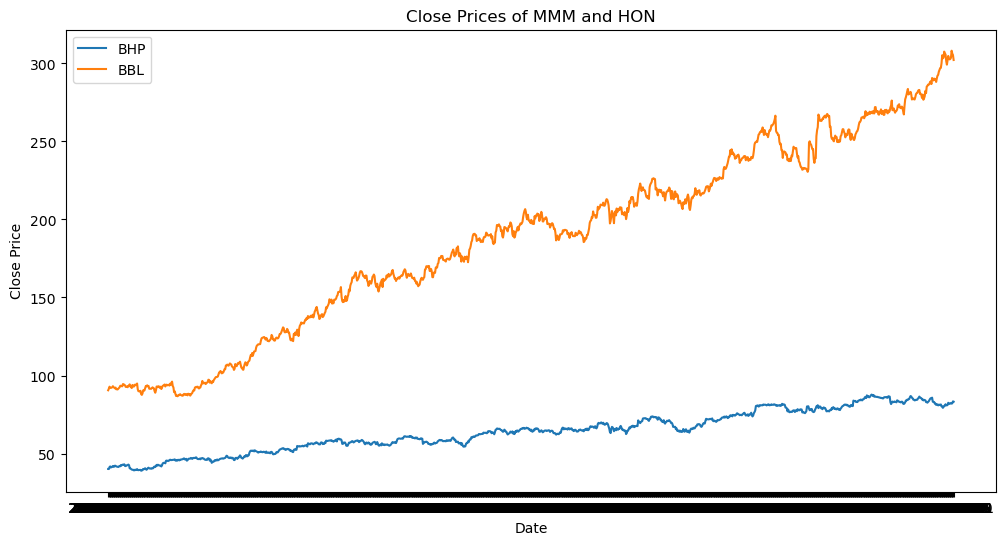

In [16]:
# Plot the prices of the two stocks
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(pair1['Date'], pair1['Close'], label='BHP')
plt.plot(pair2['Date'], pair2['Close'], label='BBL')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of MMM and HON')
plt.legend()
plt.show()
